In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py as h5

#Quick fudge to make import from ../Scripts work
sys.path.append('../../Scripts')

#Custom imports
# for color map
import seaborn as sns
# for reading datafiles 
import pandas as pd

# import script that has formation channel classification functions:
from PostProcessingScripts import * 




from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [2]:
MSSFRnameslist = []
MSSFRnameslist.append('000') # add phenomenological 

for ind_SFR, SFR in enumerate(SFRs):
	ind_x = ind_SFR+1
	for ind_GSMF, GSMF in enumerate(GSMFs):
		ind_y = ind_GSMF + 1
		for ind_MZ, MZ in enumerate(MZs):
			ind_z = ind_MZ +1

			MSSFRnameslist.append('%s%s%s'%(ind_x, ind_y, ind_z))

            
MSSFRnameslistCSV = ['.0.0.0', '.1.1.1', '.1.1.2', '.1.1.3', '.1.2.1', '.1.2.2', '.1.2.3', '.1.3.1', '.1.3.2', '.1.3.3', '.2.1.1', '.2.1.2', '.2.1.3', '.2.2.1', '.2.2.2', '.2.2.3', '.2.3.1', '.2.3.2', '.2.3.3', '.3.1.1', '.3.1.2', '.3.1.3', '.3.2.1', '.3.2.2', '.3.2.3', '.3.3.1', '.3.3.2', '.3.3.3']


In [23]:
def plotRatesEM(whichRate='intrinsic', ylims=[0,1], CSVdir='/Users/floorbroekgaarden/Projects/BlackHole-NeutronStar/csvFiles'):
    ncols=1
    nrows=1
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,7), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
    TypeColours = ['#8da0cb','#66c2a5','#fc8d62']
    ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]
    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    MSSFRcolors = sns.color_palette("husl", len(MSSFRnameslist)) 
    
    
    EMColours = ['#66c2a5', 'gold', 'orange', 'dodgerblue', 'navy', 'k', 'gray']
    Arrays_minNSmassEjecta_labels = [r'$R_{\rm{NS}}=11.5\,\rm{km}, \chi_{\rm{BH}}=0$',\
                                 r'$R_{\rm{NS}}=13\,\rm{km}, \chi_{\rm{BH}}=0$',\
                                 r'$R_{\rm{NS}}=11.5\,\rm{km}, \chi_{\rm{BH}}=0.5$', \
                                 r'$R_{\rm{NS}}=13\,\rm{km},\chi_{\rm{BH}}=0.5$',\
                                 r'$R_{\rm{NS}}=11.5\,\rm{km}, \chi_{\rm{BH}}=\rm{Qin18}$', \
                                 r'$R_{\rm{NS}}=13\,\rm{km},\chi_{\rm{BH}}=\rm{Qin18}$']
    
    nrDATAready = 15
    nModels=15
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]
    
    maxRatio_BHNS = -100
    maxRatio_BNS = -100
    minRatio_BHNS = 100
    minRatio_BNS = 100
    
    # set up lists with different BH spin and NS radii assumptions
    iii=0
    namesEMlist =['BHNS']
    for ind_chi, chi in enumerate([0.0, 0.5, 'Qin']):
        iii+=1
        BH_chi   = chi 
        for ind_Rns, NSradii in enumerate([11.5,13.0]):
            iii+=1
            Rns = NSradii
            stringg = 'Rns_'+ str(NSradii) + 'km_' + 'spinBH_' + str(chi) 
            namesEMlist.append(stringg)
    ind_t = 1
    for ind_L, MSSFRname in enumerate(MSSFRnameslist):
        for ind_EM, EMtype in enumerate(namesEMlist):
            if ind_EM ==0:
                sss = TypesLabels[ind_t]+ '_' + 'AllDCOsimulation'
            else:
                sss = TypesLabels[ind_t]+ '_' + EMtype
            
            ind_t = 1
            
            df_name = CSVdir + '/rates_MSSFR_Models_' + sss + '.csv' 
            df = pd.read_csv(df_name, index_col=0).T
            rates_L = df[MSSFRnameslistCSV[ind_L]]

            if whichRate =='intrinsic':
                rates = rates_L[::2][:nModels]
                if ind_L==0:
                    print('the intrinsic fiducial rate =',rates[0]) 

                ylabel = r'$\rm{f}_{\rm{EM}}$ (intrinsic)'

            elif whichRate=='observed':
                rates = rates_L[1::2][:nModels]
                if ind_L==0:
                    print('the observed fiducial rate =',rates[0]) 
                ylabel = r'$\rm{f}_{\rm{EM}}$'


            # obtain all the different rates
            if EMtype=='BHNS':
                rates_BHNS = rates
            elif EMtype==namesEMlist[1]:
                rates_11_0 = rates
            elif EMtype==namesEMlist[2]:
                rates_13_0 = rates
            elif EMtype==namesEMlist[3]:
                rates_11_5 = rates
            elif EMtype==namesEMlist[4]:
                rates_13_5 = rates
            elif EMtype==namesEMlist[5]:
                rates_11_5_Qin = rates
            elif EMtype==namesEMlist[6]:
                rates_13_5_Qin = rates
                
        # normalize s.t. all BHNS rate is always 1
        rates_11_0 = rates_11_0 * (1./rates_BHNS)
        rates_13_0 = rates_13_0 * (1./rates_BHNS)
        rates_11_5 = rates_11_5 * (1./rates_BHNS)
        rates_13_5 = rates_13_5 * (1./rates_BHNS)
        rates_11_5_Qin = rates_11_5_Qin * (1./rates_BHNS)
        rates_13_5_Qin = rates_13_5_Qin * (1./rates_BHNS)        
        

        maxRatio_BHNS = np.max(np.concatenate(([maxRatio_BHNS], rates_13_5)))
  
        if ind_L==0:
            COLOR='crimson'
            zorder = 100
            ls = MSSFRlinestyles[0]
            ALPHA=1
        elif ind_L in [20]:#[1]:
            COLOR='teal'
            zorder=10
            ls=MSSFRlinestyles[1]
            ALPHA=1
        elif ind_L in [6]: #[2]:
            COLOR='c'
            zorder=10
            ls = MSSFRlinestyles[2]
            ALPHA=1
        else:
            COLOR= 'lightgray' #MSSFRcolors[ind_L]
            zorder=2   
            ls = MSSFRlinestyles[0]
            ALPHA=0.1
            
            
        rates_BHNS = (rates_BHNS / rates_BHNS)    
     
        axe.plot(range(len(rates)), rates_11_0, c=EMColours[1], lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA, label=None)
        axe.scatter(range(len(rates)), rates_11_0, c=EMColours[1], s=30,  zorder=zorder, alpha=ALPHA, label=None) 
        
        axe.plot(range(len(rates)), rates_13_0, c=EMColours[2], lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA, label=None)
        axe.scatter(range(len(rates)), rates_13_0, c=EMColours[2], s=30, zorder=zorder, alpha=ALPHA, label=None)

        axe.plot(range(len(rates)), rates_11_5, c=EMColours[3], lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA, label=None)
        axe.scatter(range(len(rates)), rates_11_5, c=EMColours[3], s=30,  zorder=zorder, alpha=ALPHA, label=None) 
        
        axe.plot(range(len(rates)), rates_13_5, c=EMColours[4], lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA, label=None)
        axe.scatter(range(len(rates)), rates_13_5, c=EMColours[4], s=30, zorder=zorder, alpha=ALPHA, label=None)

        axe.plot(range(len(rates)), rates_11_5_Qin, c=EMColours[5], lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA, label=None)
        axe.scatter(range(len(rates)), rates_11_5_Qin, c=EMColours[5], s=30,  zorder=zorder, alpha=ALPHA, label=None) 
        
        axe.plot(range(len(rates)), rates_13_5_Qin, c=EMColours[6], lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA, label=None)
        axe.scatter(range(len(rates)), rates_13_5_Qin, c=EMColours[6], s=30, zorder=zorder, alpha=ALPHA, label=None)                
        

        axe.plot(np.asarray(range(len(rates))), rates_BHNS*1E6, c='k', lw=3, label=None, zorder=zorder, linestyle=ls, alpha=ALPHA)
################
        # plot fiducial result with a star
        if ind_L==0:
            axe.scatter(range(len(rates))[0], rates_11_0[0],\
                               c=EMColours[1], s=250, label=None, \
                               zorder=1000, marker='*', edgecolor='black')
            axe.scatter(range(len(rates))[0], rates_13_0[0],\
                               c=EMColours[2], s=250, label=None, \
                               zorder=1000, marker='*', edgecolor='black')
                
            axe.scatter(range(len(rates))[0], rates_11_5[0],\
                               c=EMColours[3], s=250, label=None, \
                               zorder=1000, marker='*', edgecolor='black')
            axe.scatter(range(len(rates))[0], rates_13_5[0],\
                               c=EMColours[4], s=250, label=None, \
                               zorder=1000, marker='*', edgecolor='black')
            
            axe.scatter(range(len(rates))[0], rates_11_5_Qin[0],\
                               c=EMColours[5], s=250, label=None, \
                               zorder=1000, marker='*', edgecolor='black')
            axe.scatter(range(len(rates))[0], rates_13_5_Qin[0],\
                               c=EMColours[6], s=250, label=None, \
                               zorder=1000, marker='*', edgecolor='black')            

                
            
      ################      
            

    minn, maxx = 0.00001, maxRatio_BHNS 
    print(maxRatio_BHNS, 'max')
    resN = 20
    scatterline_x = -0.25 * np.ones(resN)
    scatterline_y = np.linspace(minn,maxx, resN)
    axe.errorbar(x=-0.17, y=minn+((maxx-minn)/2), yerr=(maxx-minn)/2, capsize=3, ecolor='k', elinewidth=2, label=None)



            
    if whichRate=='intrinsic':
        textt_min = r'$\rm{min} = %.2f $'%minn# +  r'${\%}$'
        textt_max = r'$\rm{max} = %.2f $'%maxx#+  r'${\%}$'
    elif whichRate=='observed':
        textt_min = r'$\rm{min} = %.2f $'%minn#+  r'${\%}$'
        textt_max = r'$\rm{max} = %.2f $'%maxx#+  r'${\%}$'

        
    axe.text(-0.47, maxx, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='bottom')#,transform=axe.transAxes)#, weight = 'bold')


    
    xmin = -0.6
    xmax = nrDATAready -0.5 # change to len(df.T)
    xx = np.linspace(xmin,xmax,15)


    for ll in [0.01, 0.1, 1, 10, 100]:
        axe.plot(xx, ll*np.ones_like(xx), c='lightgray', linestyle='dashdot', lw=1, zorder=0, label=None)
    axe.set_ylim(ylims[0], ylims[1])

    
    # make up axes
    if ind_t ==1:
        xlabel = r'\textbf{binary population synthesis model} $\mu$'
    else:
        xlabel=r'  $\_$ '

    axe.set_xlim(xmin, xmax)
    axe == layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False)
    axe.set_yscale('log')

    # set physical labels on bottom
    physicalnames = []
    for ind_m, bps_model in enumerate(BPSnameslist):
        physicalnames.append(r'\textbf{%s}'%(bps_model) )
    axe.set_xticks(range(nModels))
    axe.set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,

    axe.set_ylim(ylims[0], ylims[1])
    
    

    axe.set_ylim(ylims[0], ylims[1])
    
    
    # create legend 
    mask=[0,1,2,3, 4, 5]
    x__ = -100*np.ones(5)
    for ind_c, channel in enumerate(Arrays_minNSmassEjecta_labels):
        plt.plot(x__,x__ , lw=5, color=EMColours[ind_c+1], label = Arrays_minNSmassEjecta_labels[ind_c])
    
    handles, labels = axe.get_legend_handles_labels()
    lgd = axe.legend(np.asarray(handles)[mask], np.asarray(Arrays_minNSmassEjecta_labels)[mask], fontsize=fs-6, ncol=3,\
             bbox_to_anchor=(.48, 1.65),  markerscale=2., scatterpoints=1, loc = 'upper center') # loc = 'upper center')     
 


    # layout and save 
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.34, hspace=0.16)
    if whichRate =='observed':
        plt.savefig('./EM_fractions' +whichRate + '.png', dpi=600, transparent=False, bbox_extra_artists=(lgd,), bbox_inches='tight')
        plt.savefig('./EM_fractions' +whichRate + '.pdf', transparent=False, bbox_extra_artists=(lgd,), bbox_inches='tight')
    else:
        plt.savefig('./supplementary_material/EM_fractions' +whichRate + '.png', dpi=600, transparent=False, bbox_extra_artists=(lgd,), bbox_inches='tight')
        plt.savefig('./supplementary_material/EM_fractions' +whichRate + '.pdf', transparent=False, bbox_extra_artists=(lgd,), bbox_inches='tight')        
    plt.show()
    plt.close()
    print('if the legend is not on a nice position its because of the fixed yticks exceeding ylim')
    
    return




# make figure 13

the observed fiducial rate = 10.827595525955116
the observed fiducial rate = 0.14307801527343236
the observed fiducial rate = 0.4617491954095053
the observed fiducial rate = 1.366812218815498
the observed fiducial rate = 3.016243584764218
the observed fiducial rate = 0.16343671208214244
the observed fiducial rate = 0.4854868559630974
0.7004756725874187 max


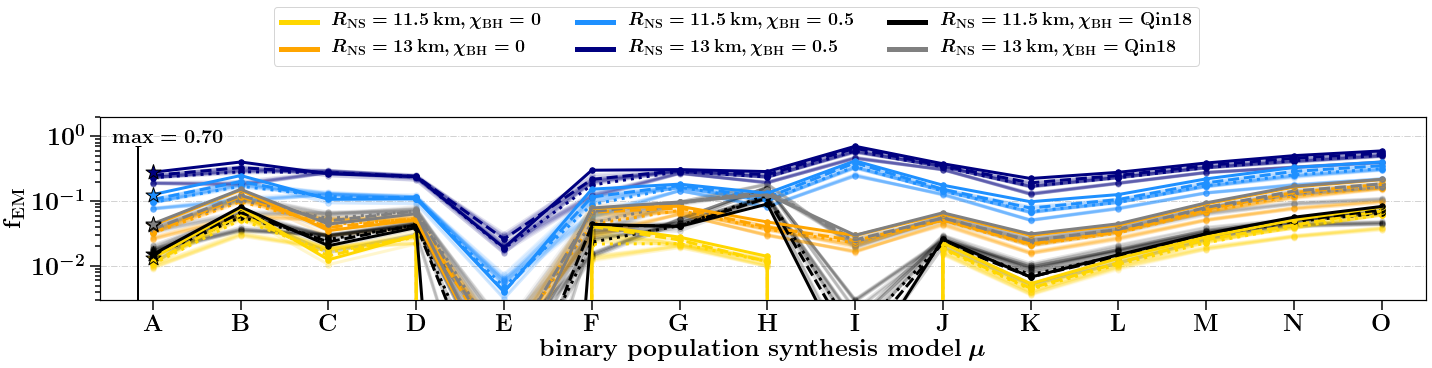

if the legend is not on a nice position its because of the fixed yticks exceeding ylim


In [24]:
CSVdir='/Users/floorbroekgaarden/Projects/BlackHole-NeutronStar/csvFiles'
ylims =[0.003,2]
plotRatesEM(whichRate='observed', ylims=ylims, CSVdir=CSVdir)

# Extra supplementary material (intrinsic, local, fractional rates):

the intrinsic fiducial rate = 43.022776513041364
the intrinsic fiducial rate = 2.1613824520241254
the intrinsic fiducial rate = 5.179990092068061
the intrinsic fiducial rate = 11.579942395673301
the intrinsic fiducial rate = 20.395648077854005
the intrinsic fiducial rate = 2.2905400487015957
the intrinsic fiducial rate = 5.3241557532979575
0.8200613014558183 max


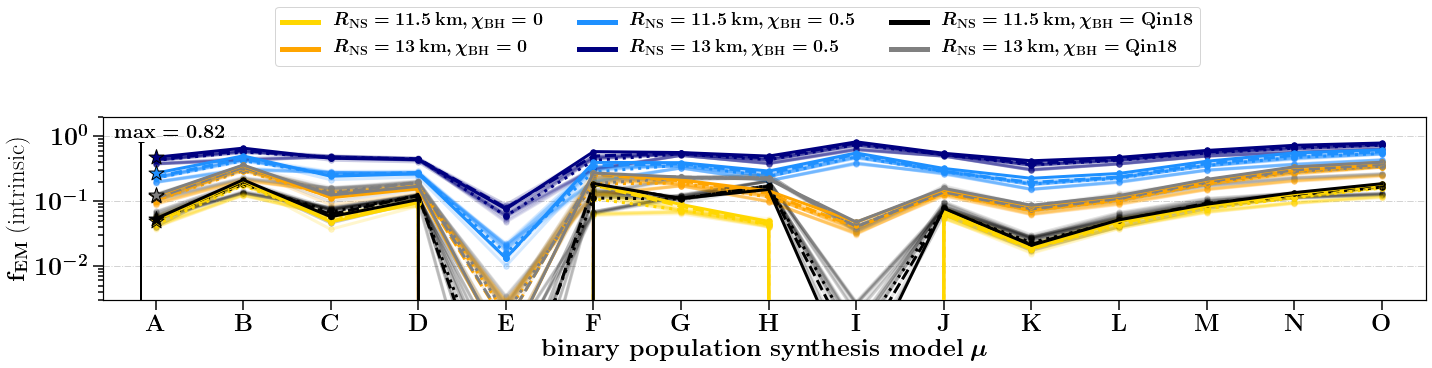

if the legend is not on a nice position its because of the fixed yticks exceeding ylim


In [25]:
ylims =[0.003,2]
plotRatesEM(whichRate='intrinsic', ylims=ylims)